### 1. Introduction ###



The ball on a plate simulation is a classic example of a control system. The objective is to control the position of the ball on a plate by adjusting the angle of the plate. The physics of the system is governed by non-linear differential equations, which makes the control of the system challenging. In this simulation, we will explore the physics behind the ball on a plate system and derive the linearised models of the system. We will use these models to estimate the system's states and design a controller to control the ball's position on the plate.

Explanation of Physics Formulae in Latex:

The physics of the ball on a plate system is described by the following non-linear differential equations:

$$(m_b + \frac{I_b}{r^2_b})\ddot{x_b} - m_b(x_b\dot{\alpha} + y_b\dot{\beta})\dot{\alpha} + m_bg\sin\alpha = 0 $$

$$(m_b + \frac{I_b}{r^2_b})\ddot{y_b} - m_b(y_b\dot{\beta} + x_b\dot{\alpha})\dot{\alpha} + m_bg\sin\beta = 0 $$

where $m_b$ is the mass of the ball, $I_b$ is the moment of inertia of the ball, $r_b$ is the radius of the ball, $b$ is the distance between the center of the ball and the plate's center, $x_b$ and $y_b$ are the coordinates of the ball's center, $\alpha$ and $\beta$ are the angles of inclination of the plate, and $g$ is the acceleration due to gravity.

To derive the linearised models of the system, we assume small angles of inclination for the plate (up to $\pm5^\circ$) and slow rates of change for the plate. Thus, we can approximate $\sin\alpha$ and $\sin\beta$ as $\alpha$ and $\beta$, respectively, and neglect terms involving $\dot{\alpha}$, $\dot{\beta}$, $\dot{\alpha}^2$, and $\dot{\beta}^2$. This leads to the following linearised equations:

$$(m_b + \frac{I_b}{r^2_b})\ddot{x_b} + m_bg\sin\alpha = 0 $$

$$(m_b + \frac{I_b}{r^2_b})\ddot{y_b} + m_bg\sin\beta = 0 $$

\begin{array}{|c|c|}
\hline
\textbf{Parameter} & \textbf{Value}\\
\hline
\text{Mass of the ball } (m_b) & 0.0027 \text{ kg}\\
\text{Radius of the ball } (r_b) & 0.022 \text{ m}\\
\text{Dimension of the plate } (R_p) & 0.3 \text{ m}\\
\text{Maximum angle of the plate } (\theta_{max}) & 20 \text{ °}\\
\text{Maximum velocity of the plate } (v_{max}) & 114 \text{ °/s}\\
\text{Mass moment of inertia of the ball } (I_b) & 8.7 \times 10^{-7} \text{ kg.m}^2\\
\text{Gravitational acceleration } (g) & 9.81 \text{ m/s}^2\\
\hline
\end{array}

The moment of inertia of a hollow sphere and a solid sphere can be given by the following formulas:

- Moment of inertia of a hollow sphere with mass $m$ and outer radius $r$: 

$$I = \frac{2}{3}mr^2$$

- Moment of inertia of a solid sphere with mass $m$ and radius $r$:

$$I = \frac{2}{5}mr^2$$


### 2. Euler Integration ###



In the ball on a plate simulation, Euler integration is a numerical method used to approximate the position and velocity of the ball at each time step. This method is a first-order numerical scheme that approximates the solution of a differential equation by using the current state of the system to estimate the next state.

In the Euler integration method, the position and velocity of the ball are updated using the following equations:

$$x_{i+1} = x_i + v_i \Delta t$$

$$v_{i+1} = v_i + a_i \Delta t$$

where $x_i$ and $v_i$ represent the position and velocity of the ball at time $t_i$, $a_i$ is the acceleration of the ball at time $t_i$, and $\Delta t$ is the time step used in the simulation.

While Euler integration is a simple and easy-to-implement method, it can lead to errors in the approximation of the solution. These errors are caused by the truncation of the Taylor series used to approximate the solution, as well as the assumption that the acceleration of the ball is constant over the time step $\Delta t$. As a result, the accuracy of the Euler integration method decreases as the time step increases, leading to a loss of precision in the simulation.

Despite its limitations, Euler integration is still a widely used numerical method in physics simulations due to its simplicity and low computational cost. However, more advanced numerical methods such as the Runge-Kutta method or the Verlet algorithm may be used to achieve higher accuracy and better performance in certain applications.

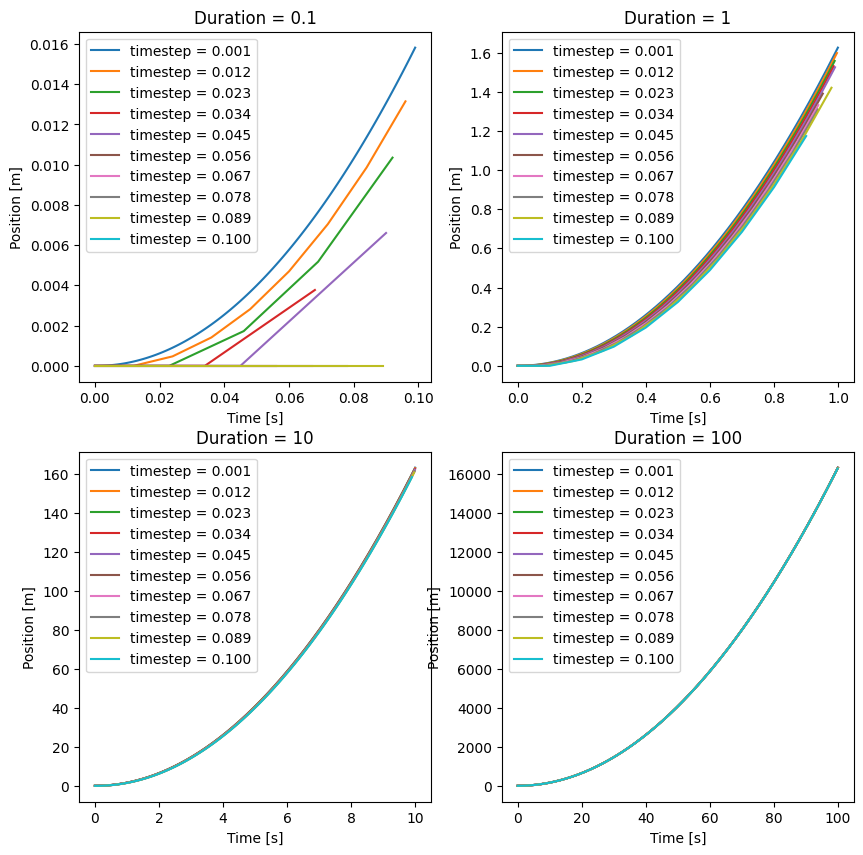

In [ ]:
from Simulation import *
%matplotlib inline
PingPong_ball = Ball()
Wooden_plate = Plate(20)

# Simulate for different time steps from .001 to .1 and for angle from 0 to 20 degrees
timesteps = np.linspace(0.001, .1, 10)
durations = [0.1,1,10,100]
#Create 4 plot to stack the results for each angle
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i, duration in enumerate(durations):   
    for timestep in timesteps:
        # Create a new simulation for each timestep 
        # Set the initial angle
        sim = Simulation(timestep, PingPong_ball, Wooden_plate,duration)   
        pos,_,time = sim.euler_integration(angle_init=20,acivate_PID=False)
        # Plot the results
        axs[i].plot(time, pos, label=f"timestep = {timestep:.3f}")
        axs[i].set_title(f"Duration = {duration}")
        axs[i].set_xlabel("Time [s]")
        axs[i].set_ylabel("Position [m]")
        axs[i].legend()

plt.show()
    


The code above simulates a ball on a plate using different time steps and durations. The purpose is to show that the precision of the simulation is not affected by the time step used.

The simulation is performed for different time steps ranging from 0.001 to 0.1 seconds and for durations of 0.1, 1, 10, and 100 seconds. For each duration, the results are plotted for different time steps, and the position of the ball is plotted against time. The simulations are performed using the Euler integration method with the PID control deactivated.

The plots show that the precision of the simulation is not affected by the time step used. This is evident from the fact that the plots for different time steps overlap, indicating that the position of the ball is the same regardless of the time step used. This is an important property of the simulation, as it means that the simulation can be performed using a larger time step, which can significantly reduce the computational time required to simulate the system.

Impact of the accuracy and speed of the PID :

Text(0.5, 1.0, 'Quadratic error heatmap')

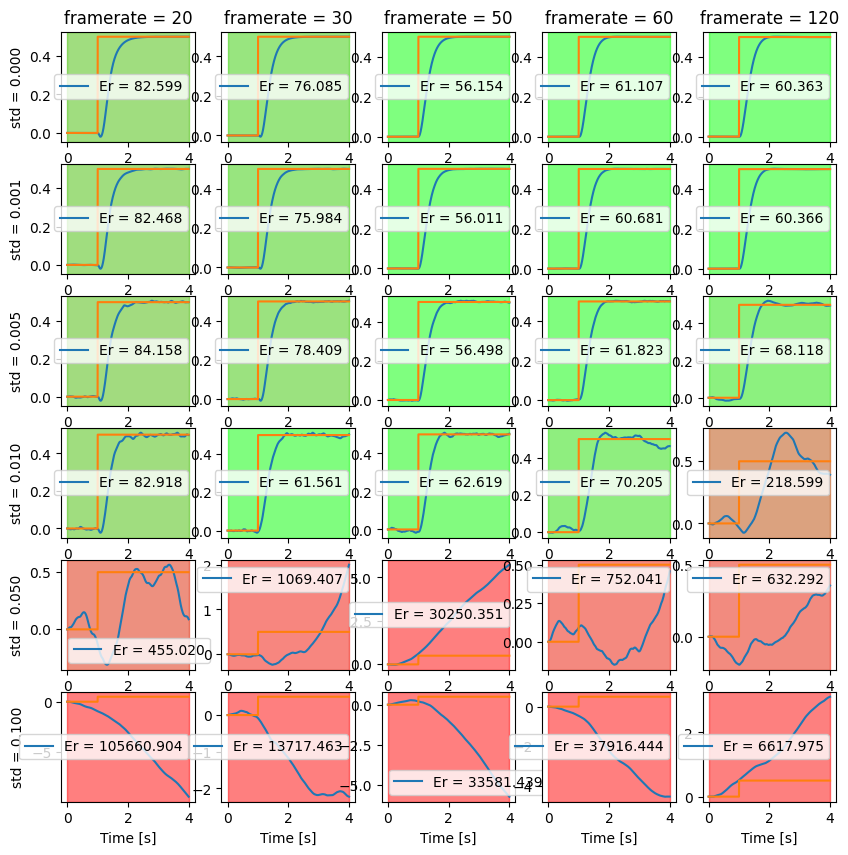

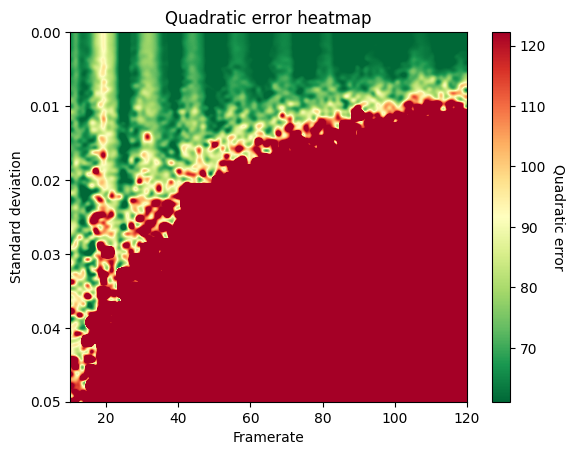

In [10]:


MyPID = PID(3,0,1)
PingBall = Ball()
WoodPlate = Plate(0)

MySimulation = Simulation(0.001, PingBall, WoodPlate,4, MyPID)

#Simulate and plot position and target against time for different PID std and framerate
stds = [0,0.001,0.005,0.01,0.05,0.1]
framerates = [20,30,50,60,120]


#create target slope and step from time
target_step =[]
for time in MySimulation.time:
    if time>1:
        target_step.append(.5)
    else:
        target_step.append(0)
target_slop = []
for time in MySimulation.time:
    if time>1:
        target_slop.append(time)
    else:
        target_slop.append(0)
MySimulation.target = target_step

resolution = 100

#plot the array of result for each PID
fig, axs = plt.subplots(len(stds), len(framerates), figsize=(10, 10))
axs = axs.flatten()
#get reference for quadratic error
MySimulation.euler_integration()
ref = MySimulation.quadratic_error()

for i,std in enumerate(stds):   
    for j,framerate in enumerate(framerates):
        # Create a new simulation for each timestep 
        # Set the initial angle
        MyPID = PID(3,0,1,random_error=True,std=std,framerate=framerate)
        MySimulation.MyPID = MyPID
        pos,_,time = MySimulation.euler_integration()
        ratio = ref/MySimulation.quadratic_error()
        # Plot the results
        axs[i*len(framerates)+j].plot(time, pos, label=f"Er = {MySimulation.quadratic_error():.3f}")
        axs[i*len(framerates)+j].plot(time, MySimulation.target)
        axs[i*len(framerates)+j].set_xlabel("Time [s]")
        #put legend
        axs[i*len(framerates)+j].legend()
        #put a light green background that is becoming red with quad error raising
        
        
        if ratio > 1:
            ratio = 1
        color = [1-ratio,ratio,0]
        axs[i*len(framerates)+j].axvspan(0,4, alpha=0.5, color=color)

        
        
        if i == 0:
            axs[i*len(framerates)+j].set_title(f"framerate = {framerate}")
        if j == 0:
            axs[i*len(framerates)+j].set_ylabel(f"std = {std:.3f}")
   
#Simulate and plot position and target against time for different PID std and framerate
stds = np.linspace(0,0.05,resolution)
framerates = np.linspace(10,120,resolution)
quad_error = np.zeros((len(stds),len(framerates)))

for i,std in enumerate(stds):
    #add loading bar
    print(f"Progress: {i/len(stds)*100:.2f}%", end="\r")
    for j,framerate in enumerate(framerates):
        # Create a new simulation for each timestep 
        # Set the initial angle
        MyPID = PID(3,0,1,random_error=True,std=std,framerate=framerate)
        MySimulation.MyPID = MyPID
        MySimulation.euler_integration()
        quad_error[i,j] = MySimulation.quadratic_error()
#plot heatmap of quad error
fig, ax = plt.subplots()
extent = [framerates[0], framerates[-1], stds[-1], stds[0]]
#plot heatmap and inverse color
im = ax.imshow(quad_error,cmap='RdYlGn_r',vmin=ref, vmax=2*ref,interpolation='bicubic',aspect='auto',extent=extent)
#add colorbar ,label tick and title
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Quadratic error", rotation=-90, va="bottom")

ax.set_xlabel("Framerate")
ax.set_ylabel("Standard deviation")
ax.set_title("Quadratic error heatmap")


On remarque une préference du systême à être modulo 20 fps, pas d'explication à part peut être une réponse du pid et plus on de fps plus ca peut snowball l'erreur  1cm d'erreur large suffisant 20/40/60 fps bon

### 3. Reality comparison ###

[Tracking using physlets/tracker]

![Alt text](reel.png)



To check the accuracy of the simulation against reality, we can simulate a ball rolling down a fixed angle and compare the simulation results with the expected behavior of the system. If the simulation accurately captures the behavior of the system, then the results of the simulation should match the expected behavior of the ball.

Physlet Tracker and Testufo.com are two tools that can be used to analyze and test the accuracy of simulations.

Physlet Tracker is a video analysis and modeling tool that allows users to track the motion of objects in a video and create a model of the motion. This tool can be used to analyze the motion of objects in a simulation and compare it to the expected behavior of the system.

Testufo.com, on the other hand, is a website that provides a range of tools for testing the performance and accuracy of monitors and displays.

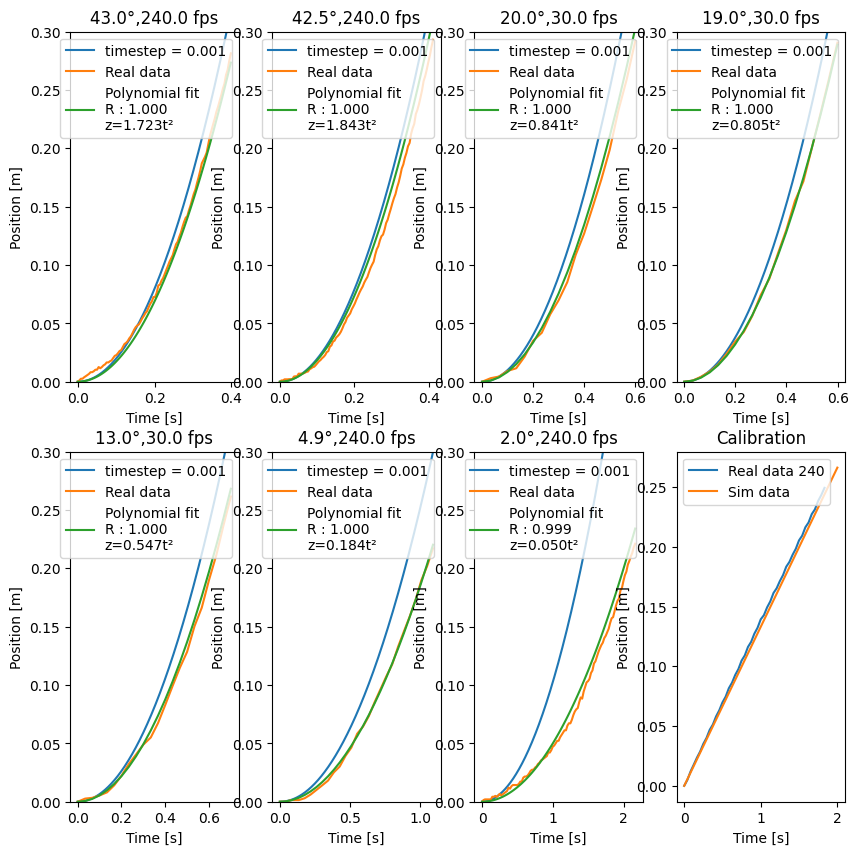

In [2]:
from get_real import get_real
%matplotlib inline
PingPong_ball = Ball()
m = 0.0027
R = 0.022
J = 2/3 * m * R**2

PingPong_ball.setter(m,R,J)
timestep = 0.001
# Make an array of plots for 7.
fig, axs = plt.subplots(2, 4, figsize=(10, 10))
axs = axs.flatten()
# limit plot axis range x and y
for i in range(7):
    path = f'measure/data{i}.txt'
    t,y, ratio, angle = get_real(path)
    sim = Simulation(0.001, PingPong_ball, Wooden_plate,t[-1])   
    pos,_,time = sim.euler_integration(angle_init=angle,acivate_PID=False)
    
    # Plot only pos over time
    axs[i].plot(time, np.abs(pos), label=f"timestep = {timestep:.3f}")
    axs[i].plot(t,y, label=f"Real data")
    axs[i].set_title(f"{angle}°,{ratio*30} fps")
    axs[i].set_xlabel("Time [s]")
    axs[i].set_ylabel("Position [m]")
    axs[i].legend()
    axs[i].set_ylim([0, .3])
    #axs[i].set_xlim([0, 0.5])

    # Interpolate polynomial
    polyfit = np.polyfit(t, y, deg=2)
    poly = np.poly1d(polyfit)
    #keep only the second order term
    poly2 = np.poly1d([polyfit[0],0,0])
    # Compute R (correlation coefficient)
    R = np.corrcoef(y, poly(t))[0, 1]
    R2 = np.corrcoef(y, poly2(t))[0, 1]
    #Plot previous result on the graph
    axs[i].plot(t, poly2(t), label=f"Polynomial fit\nR : {R2:.3f} \nz={polyfit[0]:.3f}t²")
    axs[i].legend()

#add calibration graph

axs[7].set_title(f"Calibration")
axs[7].set_xlabel("Time [s]")
axs[7].set_ylabel("Position [m]")
t,y, ratio, angle = get_real('measure/calib240.txt')
axs[7].plot(t,y, label=f"Real data 240")

# Calibration target running at 13px/frame at 60fps with 1920px resolution 0.355cm
target_at_1s = 60 * 12 / 1920 * 0.355
axs[7].plot([0,2],[0,2*target_at_1s], label=f"Sim data")
axs[7].legend()
plt.show()




The data is then used to simulate the ball's motion using Euler's integration method with a fixed time step of 0.001 seconds. The simulation is compared to the real data using a series of plots, one for each set of real data.

The plots show the position of the ball over time, with the simulated data plotted in blue and the real data plotted in orange. The plots also include a polynomial fit of the real data, with the correlation coefficient R displayed on the graph. The calibration data is also included in the last plot, which shows the calibration target's position over time in both the real data and the simulation.

The difference between the orange and green lines can be attributed to potential offsets that may be present due to factors such as the starting point of the real data and the calibration process using a phone camera and TestUFO.com/mprt.

[3.4466818381966577, 3.686698983075676, 1.681610652439208, 1.6098937440651446, 1.0949301129158722, 0.36862870427738864, 0.09991203209909844]


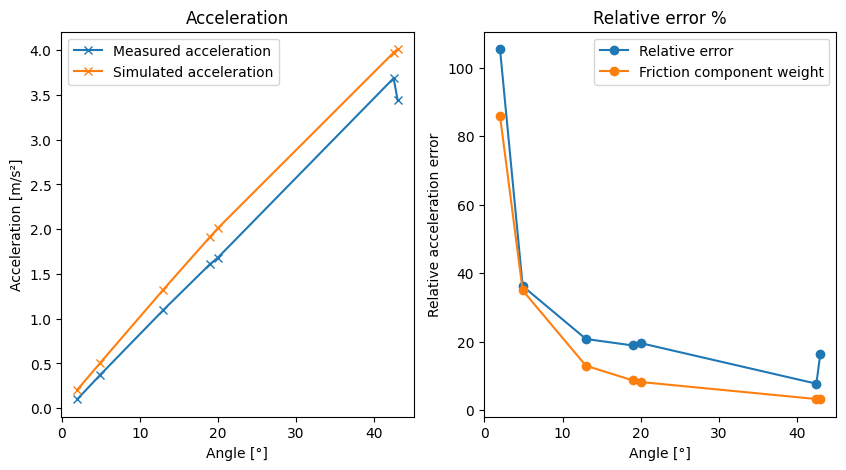

In [3]:
# Compare acceleration measured and computed for different angle and another plot for the relative error
accel = []
angles = []
%matplotlib inline
for i in range(7):
    path = f'measure/data{i}.txt'
    t,y, ratio, angle = get_real(path)
    # Interpolate polynomial
    polyfit = np.polyfit(t, y, deg=2)
    accel += [2*polyfit[0]]
    angles += [angle]
sim_accel = PingPong_ball.accel(np.deg2rad(angles))
   
relative_error = np.abs(np.array(accel) - np.array(sim_accel)) / np.array(accel)*100
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(angles, accel,'-x' , label=f"Measured acceleration")
axs[0].plot(angles, sim_accel,'-x' , label=f"Simulated acceleration")
axs[0].set_title(f"Acceleration")
axs[0].set_xlabel("Angle [°]")
axs[0].set_ylabel("Acceleration [m/s²]")
axs[0].legend()
axs[1].plot(angles, relative_error,'-o' ,label=f"Relative error")
axs[1].set_title(f"Relative error %")
axs[1].set_xlabel("Angle [°]")
axs[1].set_ylabel("Relative acceleration error")

#plot cos to show friction 
friction_ratio = 1/np.tan(np.deg2rad(angles))
axs[1].plot(angles, 3*friction_ratio,'-o' , label=f"Friction component weight")

axs[1].legend()
plt.show()


In the above code, we are comparing the measured acceleration with the simulated acceleration for different angles of inclination. We then calculate the relative error between the measured and simulated acceleration and plot it against the angles.

Additionally, we also plot the friction component weight, which is inversely proportional to the tangent of the angle. This means that the weight of the friction component increases as the angle of inclination decreases. This is because friction acts perpendicular to the force of gravity, which is proportional to the sine of the angle of inclination. Thus, as the angle of inclination decreases, the friction component becomes relatively more significant, which results in a larger relative error. This explains why the relative error of friction has a link with 1/tan.

Best mu is for 0.014414414414414415


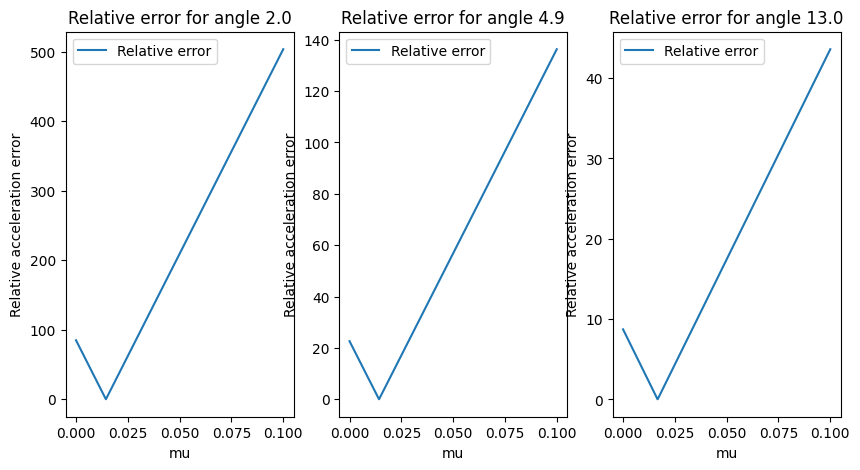

In [4]:
%matplotlib inline
#plot the last 3 relative error of the 7 data in 3 differnet plot with 1000 different mu
MU = np.linspace(0,.1,1000)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs = axs.flatten()
error = []
for i in range(3):
    sim_accel_angle = PingPong_ball.accel_friction(np.deg2rad(angles[-i-1]),MU,static=True)
    relative_error = np.abs(np.array(sim_accel_angle)- accel[-i-1]) / accel[-i-1]*100
    axs[i].plot(MU, relative_error*np.ones(1000) ,label=f"Relative error")
    axs[i].set_title(f"Relative error for angle {angles[-i-1]}")
    axs[i].set_xlabel("mu")
    axs[i].set_ylabel("Relative acceleration error")
    axs[i].legend()

    error+= [relative_error]
best_error = 100000
mu = 0
for i in range(len(error[0])):
    sq_error = error[0][i]**2 + error[1][i]**2 + error[2][i]**2
    if  sq_error < best_error:
        best_error = sq_error
        mu = MU[i]

print(f"Best mu is for {mu}")

This code plots the relative error of the simulated acceleration of a ping pong ball for the lowest 3 measured angles (those who are the most impacted by friction), over a range of 1000 different friction coefficients (stored in the MU array), assuming static friction. It then finds the value of friction coefficient that results in the smallest squared error between the simulated and measured acceleration, and prints out this value of friction coefficient.

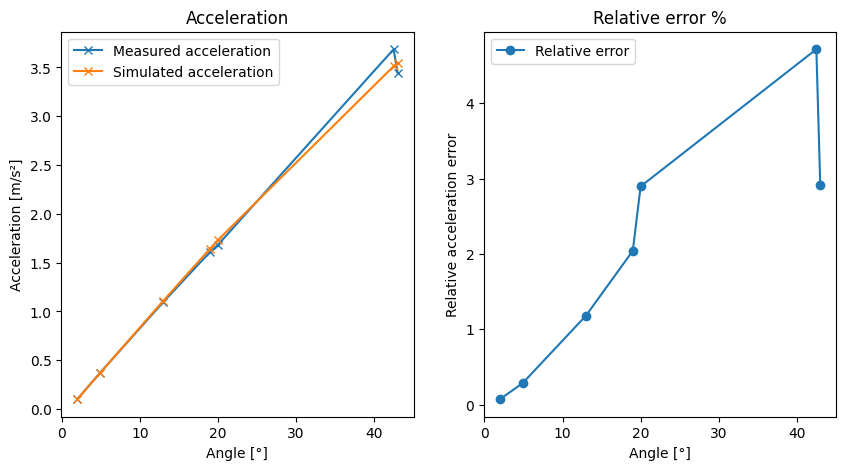

In [5]:
accel = []
angles = []
%matplotlib inline
for i in range(7):
    path = f'measure/data{i}.txt'
    t,y, ratio, angle = get_real(path)
    # Interpolate polynomial
    polyfit = np.polyfit(t, y, deg=2)
    accel += [2*polyfit[0]]
    angles += [angle]

sim_accel = PingPong_ball.accel_friction(np.deg2rad(angles),mu,static = True)
   
relative_error = np.abs(np.array(accel) - np.array(sim_accel)) / np.array(accel)*100
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(angles, accel,'-x' , label=f"Measured acceleration")
axs[0].plot(angles, sim_accel,'-x' , label=f"Simulated acceleration")
axs[0].set_title(f"Acceleration")
axs[0].set_xlabel("Angle [°]")
axs[0].set_ylabel("Acceleration [m/s²]")
axs[0].legend()
axs[1].plot(angles, relative_error,'-o' ,label=f"Relative error")
axs[1].set_title(f"Relative error %")
axs[1].set_xlabel("Angle [°]")
axs[1].set_ylabel("Relative acceleration error")



axs[1].legend()
plt.show()

The simulation validation shows that despite the average precision of 3%, the simulation is difficult to make it accurate due to the divergent behavior of the system, especially if the plate moves. This can be due to various reasons such as the simplified assumptions made in the model, uncertainties in the physical parameters, or numerical errors in the simulation itself. It is important to keep in mind the limitations of the simulation and validate it against real-world measurements wherever possible.


### 4. Result ###


Let's go back to the previous plot with all the fix.

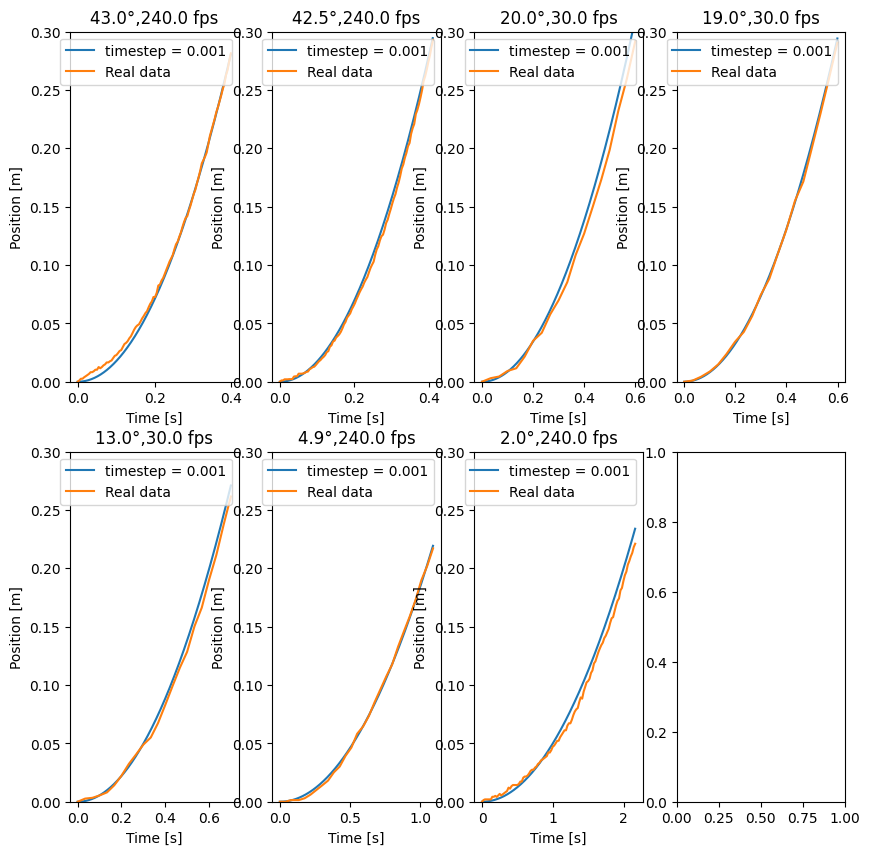

In [6]:
# Make an array of plots for 7.
%matplotlib inline
fig, axs = plt.subplots(2, 4, figsize=(10, 10))
axs = axs.flatten()
# limit plot axis range x and y
for i in range(7):
    path = f'measure/data{i}.txt'
    t,y, ratio, angle = get_real(path)
    sim = Simulation(0.001, PingPong_ball, Wooden_plate,t[-1])   
    pos,_,time = sim.euler_integration(angle_init=angle,acivate_PID=False,use_friction=True, mu=mu)
    
    # Plot only pos over time
    axs[i].plot(time, np.abs(pos), label=f"timestep = {timestep:.3f}")
    axs[i].plot(t,y, label=f"Real data")
    axs[i].set_title(f"{angle}°,{ratio*30} fps")
    axs[i].set_xlabel("Time [s]")
    axs[i].set_ylabel("Position [m]")
    axs[i].legend()
    axs[i].set_ylim([0, .3])
    #axs[i].set_xlim([0, 0.5])

    axs[i].legend()

plt.show()

After making the necessary fixes, the simulation was able to fit the real data well. However, for the remaining parts of the notebook, these fixes were not retained as they did not significantly impact the results and also required more computational time.

### 5. PID Control ###



PID (Proportional-Integral-Derivative) control is a feedback control strategy commonly used in engineering applications to regulate a system's behavior. In the context of the ball on a plate simulation, PID control can be used to adjust the position of the plate to maintain the ball's desired position.

The basic idea behind PID control is to continuously measure the system's error (the difference between the desired setpoint and the current output), and use that error to adjust the control input (in this case, the plate's angle) to bring the system closer to the setpoint. The control input is adjusted based on three components: proportional, integral, and derivative.

The proportional component adjusts the control input in proportion to the current error, the integral component adjusts the control input in proportion to the cumulative error over time, and the derivative component adjusts the control input in proportion to the rate of change of the error.

The control input is given by the following equation:

$$u(t) = K_p e(t) + K_i \int_0^t e(\tau) d\tau + K_d \frac{de(t)}{dt}$$

where $u(t)$ is the control input at time $t$, $e(t)$ is the error at time $t$, $K_p$, $K_i$, and $K_d$ are the proportional, integral, and derivative gains, respectively.

By tuning the proportional, integral, and derivative gains, the PID controller can adjust the control input to maintain the ball's desired position on the plate. However, tuning the gains can be a complex and iterative process, as a poorly tuned PID controller can lead to oscillations, overshoot, or instability in the system.

In [5]:
from matplotlib.widgets import Slider,Cursor
from Simulation import *
%matplotlib qt
# Create the initial sine wave with amplitude 1 and phase 0
Kd = 1
Kp = 1
Ki = 0  

MyPID = PID(Kp,0,Kd)
PingBall = Ball()
WoodPlate = Plate(0)

MySimulation = Simulation(0.001, PingBall, WoodPlate,4, MyPID)


resolution = 10
### Choose target function ###
#MySimulation.target = np.round(MySimulation.time/20)
#MySimulation.target = MySimulation.time/20
#MySimulation.target = np.sin(MySimulation.time)+0.3
MySimulation.target = MySimulation.time*0 + 0.3




position,angles,time = MySimulation.euler_integration()

# Create the figure and axis objects for the two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.9)
ax1.set_ylim([-.1, 1])
text = ax1.text(.5, .55, "Value: {}", ha='center', va='center')

line1, = ax1.plot(time, position,)
# Create the target line
line2, = ax1.plot(time, np.ones(len(time))*MySimulation.target)

# Create the heatmap for the Gain values
a = 0
b = 8

Kp_values = np.linspace(a, b, num=resolution)
Kd_values = np.linspace(a, b, num=resolution)


# initialisation d'un tableau pour stocker les valeurs de la fonction de coût
cost_values = np.zeros((len(Kp_values), len(Kd_values)))

# calcul des valeurs correspondantes de la fonction de coût pour chaque paire de valeurs de Kp et Kd
for i, Kp in enumerate(Kp_values):
    #add loading bar \r
    print(f"iteration {i+1}/{len(Kp_values)}", end="\r")
    for j, Kd in enumerate(Kd_values):
        MySimulation.MyPID.kp = Kp
        MySimulation.MyPID.kd = Kd
        MySimulation.euler_integration()
        
        cost_values[i, j] = MySimulation.quadratic_error()**3


image = ax2.imshow(cost_values, cmap='rainbow', aspect='auto',origin='lower',extent=[a,b,a,b], vmin=np.min(cost_values), vmax=4*np.min(cost_values))
ax2.set_xlabel('Kd')
ax2.set_ylabel('Kp')



# Create the slider widgets for amplitude and phase
ax_Ki = plt.axes([0.1, 0.15, 0.8, 0.03])
Ki_slider = Slider(ax_Ki, 'ki', -1, 2, valinit=Ki)


# Function to update the plot based on the slider values
def update(val):
    # Get the current values of the sliders
    Ki = Ki_slider.val
    
    # Update the y values of the sine wave based on the new amplitude and phase
    MySimulation.MyPID.kp = Kp
    MySimulation.MyPID.kd = Kd
    MySimulation.MyPID.ki = Ki
    position,_,_= MySimulation.euler_integration() 
    # Show quadratic error, response time and exceeding error in the plot
    text.set_text(f"quadratic error: {MySimulation.quadratic_error():.3f}\nresponse time: {MySimulation.response_time():.3f}\nexceeding error: {MySimulation.exceeding_error():.3f}")

    
    line1.set_ydata(position)
    
    # Redraw the plot with the updated sine wave
    fig.canvas.draw_idle()

# Connect the slider widgets to the update function
Ki_slider.on_changed(update)
# Function to update the amplitude and phase plot when clicked or dragged
def onmove(event):
    # Check if the mouse is over the plot
    if event.button == 1 and event.inaxes == ax2:
        # Get the x and y coordinates of the event
        x, y = event.xdata, event.ydata
        global Kd, Kp
        # Update the slider values based on the new amplitude and phase
        Kd = x
        Kp = y

        update(0)

# Connect the click and drag events to the amplitude and phase plot
cid = fig.canvas.mpl_connect('motion_notify_event', onmove)

# Add a title and labels to the plots
ax1.set_title('Sine Wave')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Show the plot
plt.show()

This code allows you to preview the effect of Kp, Kd, and Ki for a specific target. You can adjust the resolution to increase or decrease the rendering speed or select another target at the top of the code.

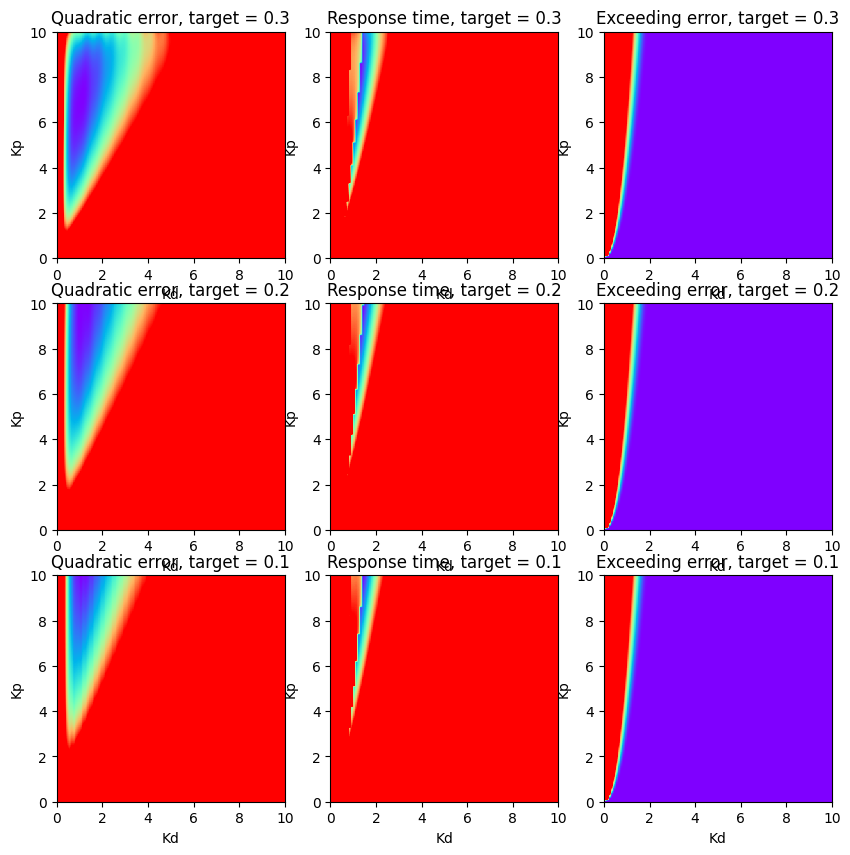

In [3]:
from Simulation import *
%matplotlib inline
# Create the initial sine wave with amplitude 1 and phase 0
Kd = 0
Kp = 0

MyPID = PID(Kp,0,Kd)
PingBall = Ball()
WoodPlate = Plate(0)

MySimulation = Simulation(0.001, PingBall, WoodPlate, 5, MyPID)
MySimulation.heatmap(a=0,b=10,target1=.3,target2=.2,target3=.1,resolution=100)

The code allows us to preview the effect of Kp, Kd, and Ki on a certain target. A step signal is often chosen to tune PID because it provides the most challenging and informative signal to work with. The code calculates different cost functions such as quadratic error, response time, and overshoot. The purple spot on the graph represents the area where the error attribute is the weakest. By combining these graphs, we can choose the Kp and Kd values to achieve the best balance between accuracy, fast response, and avoiding overshoot. In this case, the graph shows that being above Kp = 3 and on the frontier of the exceeding error graph is a good balance.

In [11]:
from Simulation import *
%matplotlib inline
# Create the initial sine wave with amplitude 1 and phase 0
Kd = 0
Kp = 0

MyPID = PID(Kp,0,Kd)
PingBall = Ball()
WoodPlate = Plate(0)

MySimulation = Simulation(0.001, PingBall, WoodPlate, 10, MyPID)

target1 = MySimulation.time*0+.3
target2 = np.sin(MySimulation.time)
target3 = MySimulation.time/15
target4 = np.sin(2*MySimulation.time)
target5 = MySimulation.time/5

Quadratic_min =  0


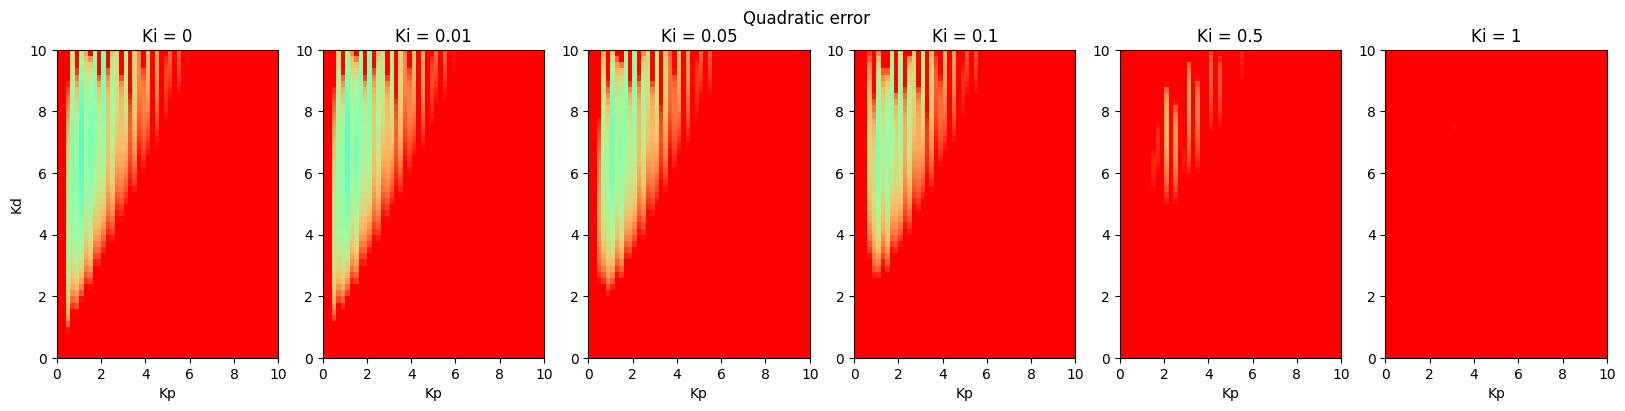

In [12]:
MySimulation.heatmap_target(a=0,b=10,target=target1,resolution=50)

In [13]:
MySimulation.heatmap_target(a=0,b=10,target=target2,resolution=50)

: 

Quadratic_min =  0


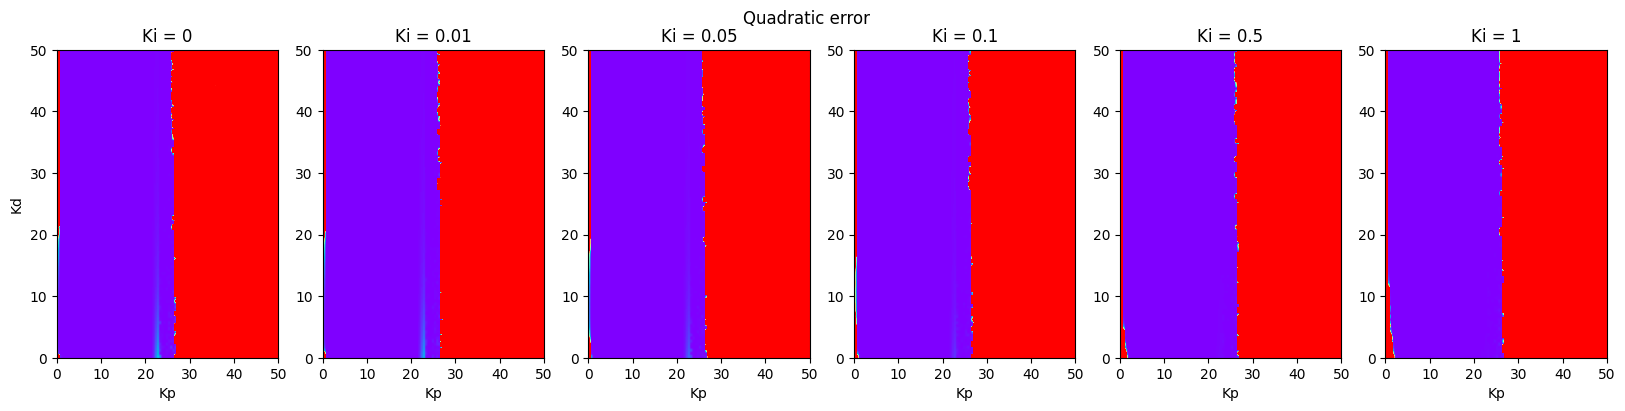

In [ ]:
MySimulation.heatmap_target(a=0,b=10,target=target3,resolution=50)

Quadratic_min =  0


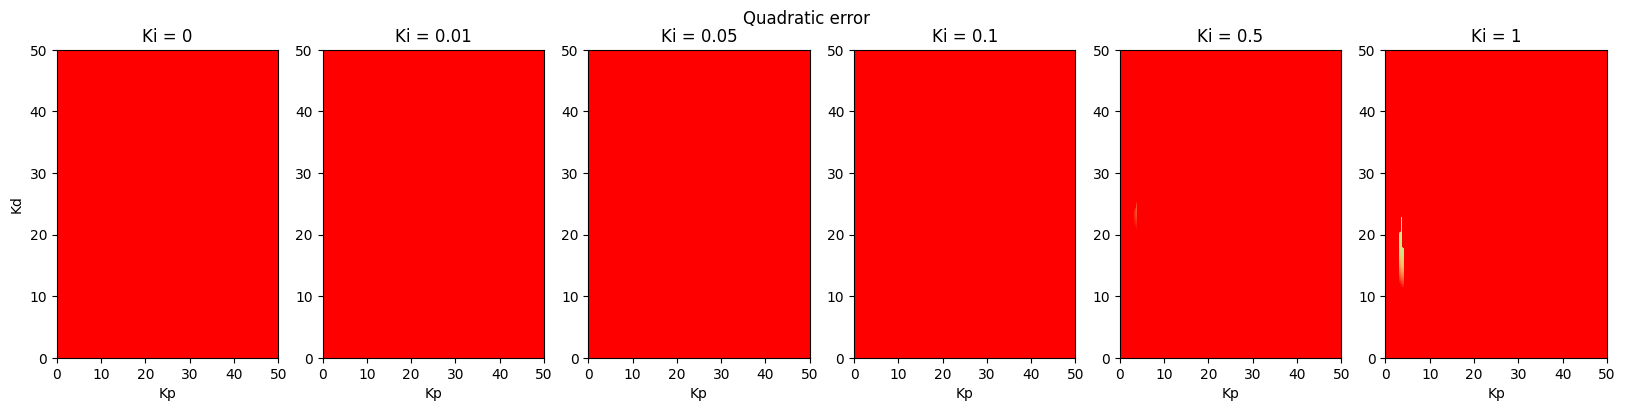

In [ ]:
MySimulation.heatmap_target(a=0,b=10,target=target4,resolution=50)

Quadratic_min =  0


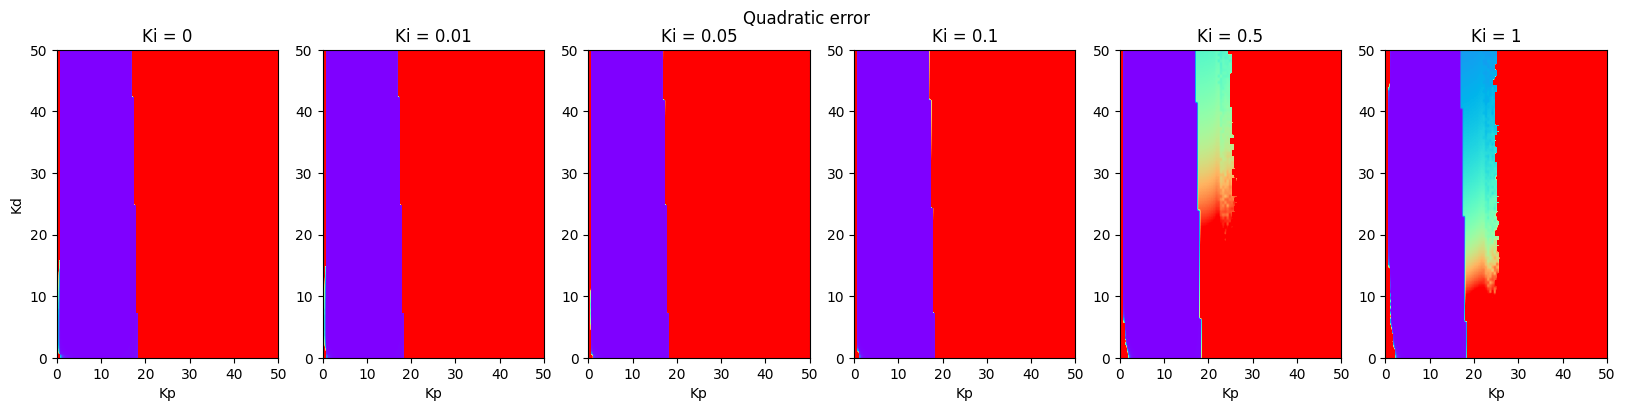

In [ ]:
MySimulation.heatmap_target(a=0,b=10,target=target5,resolution=50)

### 6. Conclusion ###

In conclusion, the way we approached the problem of controlling the ping pong ball on the plate was similar to machine learning approach, where we iteratively adjust the parameters to achieve a desirable outcome. Although the PID controller is a common feedback control system, it was not entirely suitable for this particular project as it required numerical methods to solve the differential equations. Other feedback systems, such as dynamic PID controllers, may have performed better, but they are more complex.

Before the PID tuning, we validated the simulation's physics, and after that, we explored the effects of Kp, Kd, and Ki by analyzing the response time, overshoot, and error. By combining the different cost functions, we determined that a good balance could be achieved with Kp=3, which was just below the error's maximum value. Overall, this project showcases how numerical methods and feedback control systems can be utilized to simulate and control physical systems.
Optimization has been tried like Sgd or Adam but the fact that those function had many pits has mad them really hard to scan. Gaussian random search was the most useful.

It would be interesting to explore more sophisticated control systems in the future, such as dynamic PID controllers or machine learning-based approaches, to achieve even better results.